In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.combine import SMOTEENN


In [11]:
#read the encoded dataset depression
df=pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\datasets\cleaned_data.csv")
df.head(9)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Depression
0,1,23.0,51,5.0,8.97,2.0,0,0,3,1,...,1,2,1,2,0,1,3,10,6.655000,1
1,0,24.0,3,2.0,5.90,5.0,0,1,10,0,...,2,4,1,4,0,1,4,4,5.123958,0
2,1,17.0,44,3.0,7.03,5.0,2,0,5,0,...,1,5,0,4,1,2,3,4,4.190609,0
3,0,17.0,49,3.0,5.59,2.0,1,1,7,1,...,2,1,1,0,1,4,0,9,7.467984,1
4,0,25.0,16,4.0,8.13,3.0,0,1,16,1,...,1,1,1,1,0,4,3,9,0.406585,0
5,1,25.0,39,2.0,5.70,3.0,2,0,12,0,...,3,5,0,4,1,4,2,7,4.207805,1
6,1,24.0,46,3.0,9.54,4.0,1,0,10,0,...,5,3,1,1,0,0,0,4,4.956508,0
7,0,24.0,6,2.0,8.04,4.0,2,3,11,0,...,5,1,1,4,1,2,2,8,9.909730,1
8,1,19.0,33,3.0,9.79,1.0,1,1,2,1,...,2,1,0,2,0,1,3,19,1.486374,1


In [ ]:
#####apply scaling if model need scaling#####

# def apply_scaling_if_needed(df, target_column):
#     numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    
#     # no need to apply scaling on target column
#     if target_column in numeric_columns:
#         numeric_columns.remove(target_column)

#     scaler = StandardScaler()

#     for column in numeric_columns:
#         unique_values = set(df[column].unique())

#         if unique_values == {0, 1}:  
#             print(f"No need for scaling on {column}")
#         else:
#             df[column] = scaler.fit_transform(df[[column]])
#             print(f"Scaling applied on {column}")

# apply_scaling_if_needed(df, target_column='Depression')


In [12]:
df["Depression"].value_counts(normalize=True) * 100

Depression
1    69.004947
0    30.995053
Name: proportion, dtype: float64

In [ ]:
# X = df.drop(columns=['Depression'])  
# y = df['Depression'] 

In [ ]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [13]:
#smote data
X= df.drop(['Depression'], axis = 1)
y= df['Depression']

smote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_smote, y_smote = smote_enn.fit_resample(X,y)

print(f'Resampled dataset shape: {y_smote.value_counts(normalize = True)}')

data_2 = pd.concat([X_smote, y_smote],axis=1)

c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Resampled dataset shape: Depression
0    0.643429
1    0.356571
Name: proportion, dtype: float64


In [14]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.30,random_state=1)

c:\Users\arwah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Complete LogisticRegression Training Accuracy: 0.931835249263474
Complete LogisticRegression Test Accuracy: 0.9299096913330638
Confusion Matrix:
 [[4472  323]
 [ 197 2427]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      4795
           1       0.88      0.92      0.90      2624

    accuracy                           0.93      7419
   macro avg       0.92      0.93      0.92      7419
weighted avg       0.93      0.93      0.93      7419



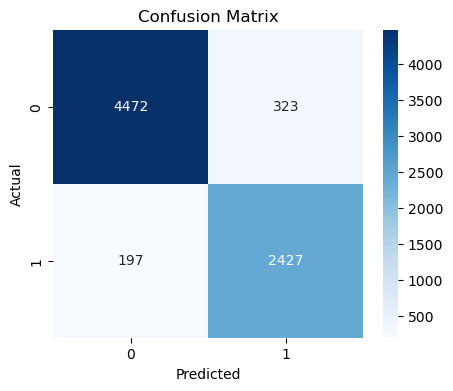

In [ ]:
#first model "LogisticRegression" and Class Weigh

model= LogisticRegression(class_weight='balanced', random_state=1)
model.fit(X_train, y_train)


# logisticRegression
logR_predict = model.predict(X_test)

# accuracy
Tr_score = model.score(X_train, y_train)
Tst_score = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, logR_predict)

print("Complete LogisticRegression Training Accuracy:", Tr_score)
print("Complete LogisticRegression Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, logR_predict))
print("\nClassification Report:\n", classification_report(y_test, logR_predict))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

X_train shape: (17311, 25)
Complete LogisticRegression Training ! 0.9417133614464791
Complete LogisticRegression Test! 0.9436581749561935
Accuracy: 0.9437
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      4795
           1       0.93      0.91      0.92      2624

    accuracy                           0.94      7419
   macro avg       0.94      0.94      0.94      7419
weighted avg       0.94      0.94      0.94      7419



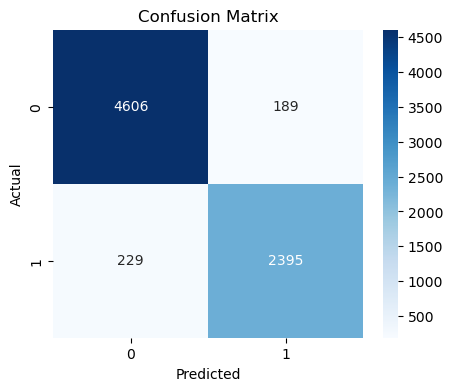

In [16]:
#"LogisticRegression" with selection   

selector = SelectKBest(f_classif, k=25)  

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print("X_train shape:", X_train.shape)

model = LogisticRegression(C=7, solver='liblinear')
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
Tr_score=model.score(X_train_selected,y_train)
Tst_score=model.score(X_test_selected,y_test)

print("Complete LogisticRegression Training !",Tr_score)
print("Complete LogisticRegression Test!",Tst_score)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", class_report)


plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [17]:
print("X_train_selected shape:", X_train_selected.shape)  
print("X_test_selected shape:", X_test_selected.shape)    
print("Model Coefficients Shape:", model.coef_.shape)    

X_train_selected shape: (17311, 25)
X_test_selected shape: (7419, 25)
Model Coefficients Shape: (1, 25)


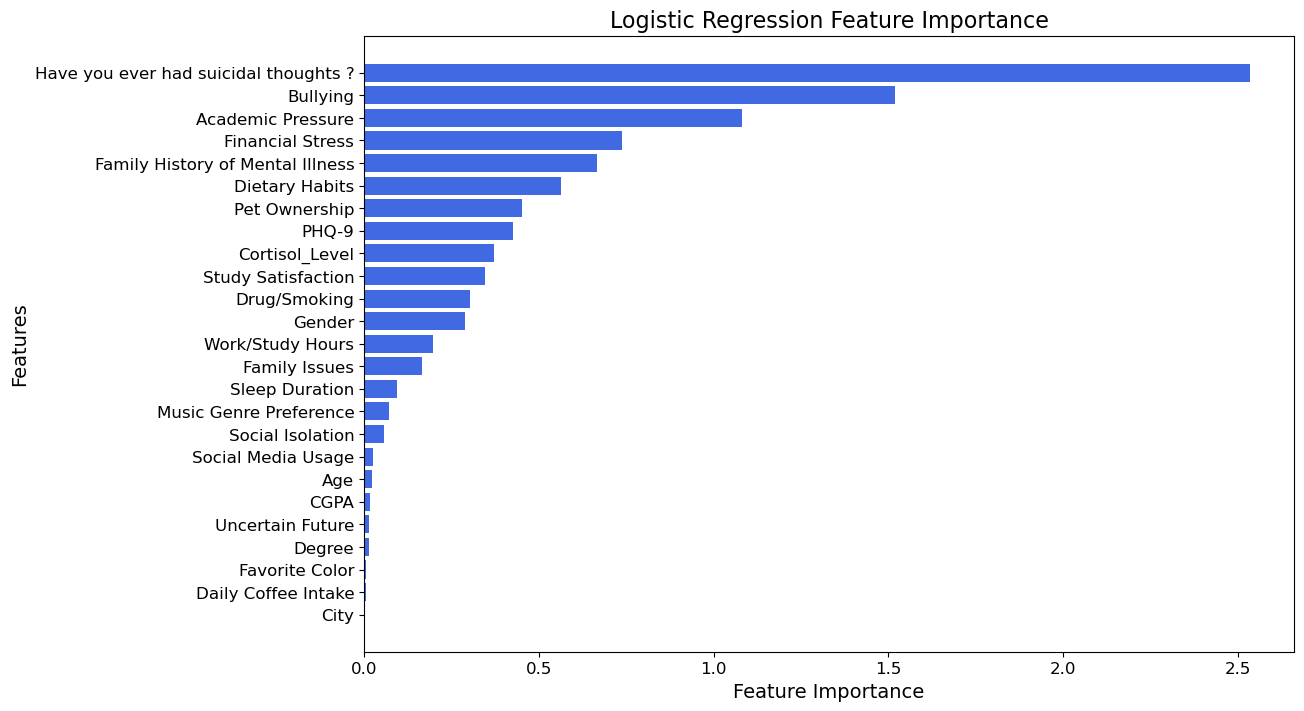

In [18]:
# Feature Importance
feature_importance = np.abs(model.coef_[0])  
feature_names = X_train.columns[selector.get_support()]  
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="royalblue")
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Logistic Regression Feature Importance", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis() 
plt.show()

In [19]:
#second model XGB with some improvements 


model2 = XGBClassifier(scale_pos_weight=1.5, 
                       max_depth=4,  
                       learning_rate=0.05,  
                       n_estimators=300,  
                       subsample=0.8,  
                       colsample_bytree=0.8,
                       gamma=2,
                       random_state=42) 
model2.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train, model2.predict(X_train))
test_accuracy = accuracy_score(y_test, model2.predict(X_test))

# accuracy
y_pred_xgb = model2.predict(X_test)

print("XGB Training Accuracy:", train_accuracy)
print("XGB Test Accuracy:", test_accuracy)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGB Training Accuracy: 0.9831898792675178
XGB Test Accuracy: 0.9726378218088692
XGBoost Accuracy: 0.9726378218088692
Confusion Matrix:
 [[4688  107]
 [  96 2528]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4795
           1       0.96      0.96      0.96      2624

    accuracy                           0.97      7419
   macro avg       0.97      0.97      0.97      7419
weighted avg       0.97      0.97      0.97      7419



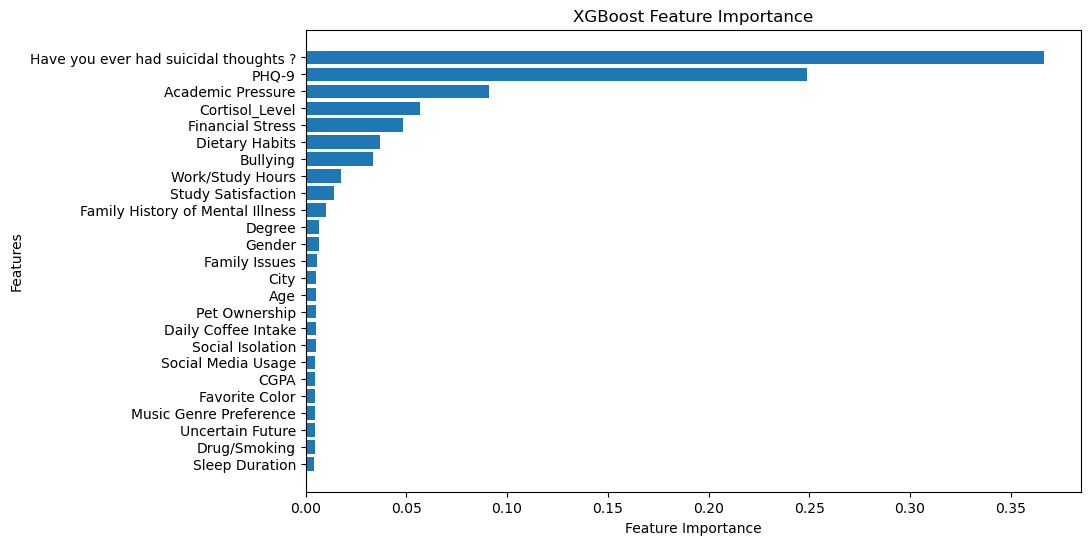

In [21]:
feature_importance = model2.feature_importances_

sorted_idx = feature_importance.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()


In [ ]:
#third model Balanced Random Forest Classifier without improvements

# rus = RandomUnderSampler(random_state=1)
# Xtrain_res, Ytrain_res = rus.fit_resample(X_train, y_train)

rf = RandomForestClassifier(
    class_weight={0: 1, 1: 1.5}, 
    random_state=1, 
    n_estimators=50,  
    max_depth=3,   
    min_samples_split=4,  
    min_samples_leaf=2  
)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)


rf_train_acc = rf.score(X_train, y_train)
rf_test_acc = accuracy_score(y_test, rf_predict)


print("Random Forest Training Accuracy:", rf_train_acc)
print("Random Forest Test Accuracy:", rf_test_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predict))
print("Classification Report:\n", classification_report(y_test, rf_predict))
print(f"rf Accuracy: {accuracy}")




Random Forest Training Accuracy: 0.9537866096701519
Random Forest Test Accuracy: 0.9522846744844319
Confusion Matrix:
 [[4629  166]
 [ 188 2436]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      4795
           1       0.94      0.93      0.93      2624

    accuracy                           0.95      7419
   macro avg       0.95      0.95      0.95      7419
weighted avg       0.95      0.95      0.95      7419

rf Accuracy: 0.9710203531473245


In [ ]:
#third model Balanced Random Forest Classifier
rus = RandomUnderSampler(random_state=1)
Xtrain_res, Ytrain_res = rus.fit_resample(X_train, y_train)

rf = RandomForestClassifier(
    class_weight={0: 1, 1: 1.5}, 
    random_state=1, 
    n_estimators=50,  
    max_depth=3,   
    min_samples_split=4,  
    min_samples_leaf=2  
)
rf.fit(Xtrain_res, Ytrain_res)
rf_predict = rf.predict(X_test)


rf_train_acc = rf.score(Xtrain_res, Ytrain_res)
rf_test_acc = accuracy_score(y_test, rf_predict)


print("Random Forest Training Accuracy:", rf_train_acc)
print("Random Forest Test Accuracy:", rf_test_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predict))
print("Classification Report:\n", classification_report(y_test, rf_predict))
print(f"rf Accuracy: {accuracy}")



Random Forest Training Accuracy: 0.936470778172425
Random Forest Test Accuracy: 0.9264051758997169
Confusion Matrix:
 [[4333  462]
 [  84 2540]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94      4795
           1       0.85      0.97      0.90      2624

    accuracy                           0.93      7419
   macro avg       0.91      0.94      0.92      7419
weighted avg       0.93      0.93      0.93      7419

rf Accuracy: 0.9710203531473245


In [ ]:
#BEST VERSION OF MODEL
model3= BalancedRandomForestClassifier(n_estimators=500,max_depth=7,class_weight='balanced_subsample',min_samples_split=15, min_samples_leaf=6,random_state=42)
model3.fit(X_train, y_train)
y_pred_rf = model3.predict(X_test)
print("Balanced Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Balanced Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(f"rf Accuracy: {accuracy}")
print("rf Training Accuracy:", train_accuracy)
print("rf Test Accuracy:", test_accuracy)

c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Balanced Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4795
           1       0.93      0.96      0.95      2624

    accuracy                           0.96      7419
   macro avg       0.96      0.96      0.96      7419
weighted avg       0.96      0.96      0.96      7419

Balanced Random Forest Confusion Matrix:
[[4615  180]
 [  97 2527]]
rf Accuracy: 0.9710203531473245
rf Training Accuracy: 0.9831898792675178
rf Test Accuracy: 0.9726378218088692


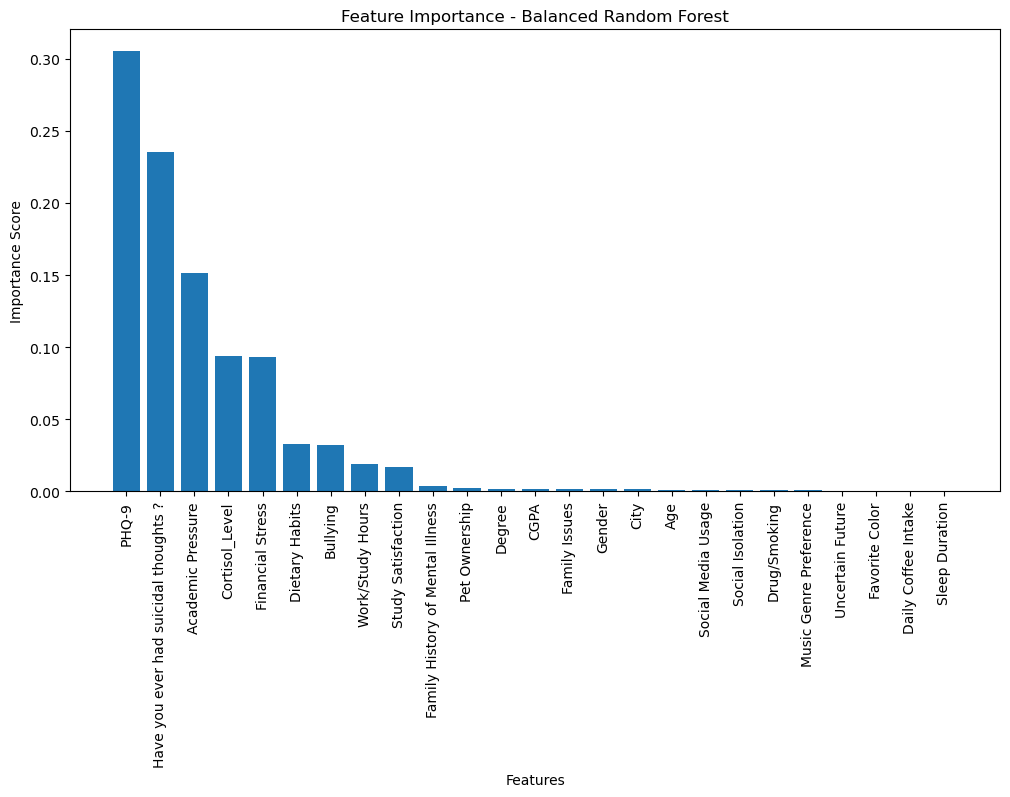

In [ ]:
importances = model3.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importance - Balanced Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [29]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='lightgbm')
from lightgbm import LGBMClassifier
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
lgb_model = LGBMClassifier(
    num_leaves=31,  
    min_child_samples=45,  
    learning_rate=0.02,  
    n_estimators=800,  
    colsample_bytree=0.8,   
    bagging_freq=5,  
    min_child_weight=4,
    lambda_l1=1,  
    max_bin=255,
    scale_pos_weight=scale_pos_weight,  
    random_state=42
)


lgb_model.fit(X_train, y_train)
lgb_predict = lgb_model.predict(X_test)


lgb_test_acc = accuracy_score(y_test, lgb_predict)
lgb_cv_mean = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='accuracy').mean()


print(f"GBM Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion_matrix(y_test, lgb_predict))
print(f"LightGBM CV Mean Accuracy: {lgb_cv_mean:.4f}")
print("Classification Report:\n", classification_report(y_test, lgb_predict))
print("GBM Training Accuracy:", train_accuracy)
print(f"LightGBM Test Accuracy: {lgb_test_acc:.4f}")

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 6194, number of negative: 11117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 17311, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357807 -> initscore=-0.584894
[Li

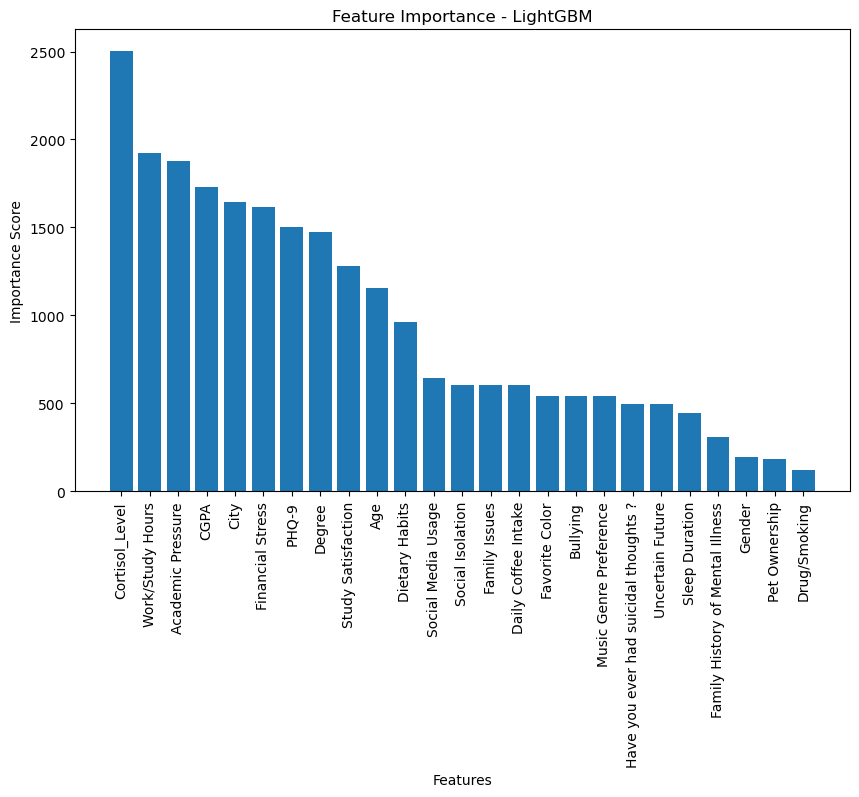

In [30]:
importance = lgb_model.feature_importances_
features = X_train.columns


indices = np.argsort(importance)[::-1]


plt.figure(figsize=(10, 6))
plt.title("Feature Importance - LightGBM")
plt.bar(range(len(features)), importance[indices], align="center")
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [31]:
#first try 
gbm = GradientBoostingClassifier(random_state=1)
gbm.fit(X_train, y_train)
gbm_predict = gbm.predict(X_test)
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, gbm_predict))
gbm_train_acc = accuracy_score(y_train, gbm.predict(X_train))
gbm_test_acc = accuracy_score(y_test, gbm_predict)


print(f"Gradient Boosting Training Accuracy: {gbm_train_acc:.4f}")
print(f"Gradient Boosting Test Accuracy: {gbm_test_acc:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, gbm_predict))
print("Classification Report:\n", classification_report(y_test, gbm_predict))

Gradient Boosting Test Accuracy: 0.9714247203127107
Gradient Boosting Training Accuracy: 0.9753
Gradient Boosting Test Accuracy: 0.9714
Confusion Matrix:
 [[4716   79]
 [ 133 2491]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      4795
           1       0.97      0.95      0.96      2624

    accuracy                           0.97      7419
   macro avg       0.97      0.97      0.97      7419
weighted avg       0.97      0.97      0.97      7419



In [32]:
gbm = GradientBoostingClassifier( learning_rate=0.03, 
    n_estimators=600,  
    max_depth=4,  
    min_samples_split=10,  
    min_samples_leaf=5,  
    subsample=0.85,  
    random_state=1)

gbm.fit(X_train, y_train)

gbm_predict = gbm.predict(X_test)

print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, gbm_predict))
gbm_train_acc = accuracy_score(y_train, gbm.predict(X_train))
gbm_test_acc = accuracy_score(y_test, gbm_predict)


print(f"Gradient Boosting Training Accuracy: {gbm_train_acc:.4f}")
print(f"Gradient Boosting Test Accuracy: {gbm_test_acc:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, gbm_predict))
print("Classification Report:\n", classification_report(y_test, gbm_predict))

Gradient Boosting Test Accuracy: 0.9723682436986116
Gradient Boosting Training Accuracy: 0.9884
Gradient Boosting Test Accuracy: 0.9724
Confusion Matrix:
 [[4707   88]
 [ 117 2507]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4795
           1       0.97      0.96      0.96      2624

    accuracy                           0.97      7419
   macro avg       0.97      0.97      0.97      7419
weighted avg       0.97      0.97      0.97      7419



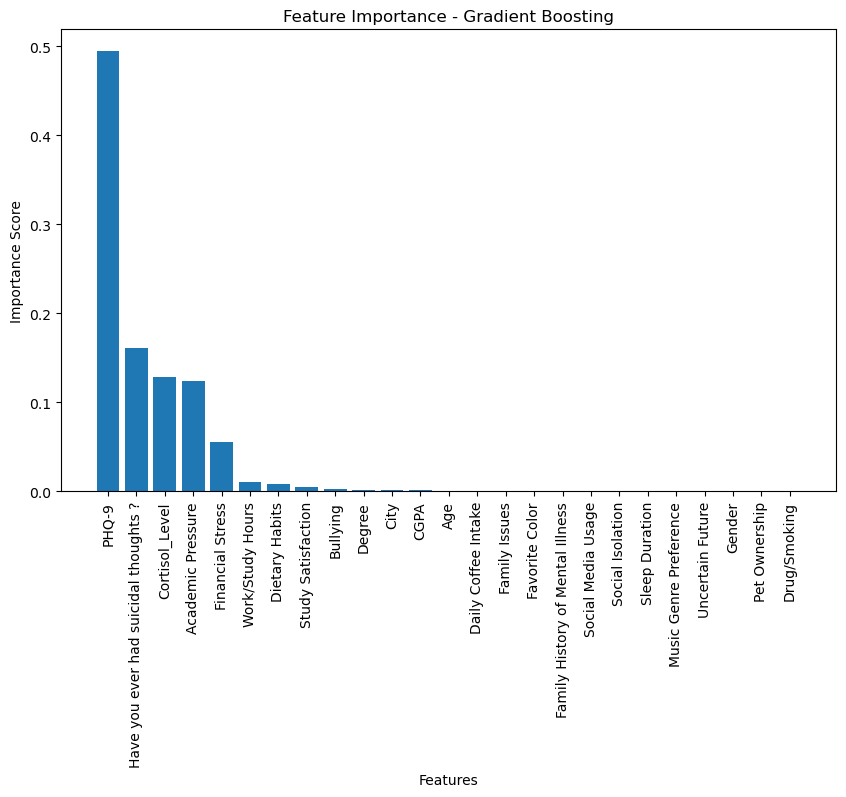

In [33]:
importance = gbm.feature_importances_
features = X_train.columns


indices = np.argsort(importance)[::-1]


plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Gradient Boosting")
plt.bar(range(len(features)), importance[indices], align="center")
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [34]:
model = SVC()  

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("SVM Training Accuracy:", train_accuracy)
print("SVM Test Accuracy:", test_accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
accuracy = accuracy_score(y_test, y_pred)

SVM Training Accuracy: 0.9551730113800474
SVM Test Accuracy: 0.9533629869254616

Confusion Matrix:
 [[4683  112]
 [ 234 2390]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      4795
           1       0.96      0.91      0.93      2624

    accuracy                           0.95      7419
   macro avg       0.95      0.94      0.95      7419
weighted avg       0.95      0.95      0.95      7419



In [ ]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix


# # إنشاء نموذج Naive Bayes
# nb_model = GaussianNB()

# # تدريب النموذج
# nb_model.fit(X_train, y_train)

# # التنبؤ
# y_pred = nb_model.predict(X_test)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Naive Bayes Test Accuracy: {accuracy:.4f}")

# # طباعة مصفوفة التشويش
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix


# # إنشاء نموذج MLP (Multi-layer Perceptron)
# mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# # تدريب النموذج
# mlp_model.fit(X_train, y_train)

# # التنبؤ
# y_pred = mlp_model.predict(X_test)

# # حساب الدقة
# accuracy = accuracy_score(y_test, y_pred)
# print(f"MLPClassifier Test Accuracy: {accuracy:.4f}")

# # طباعة مصفوفة التشويش
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix



# model = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=10, cat_features=[], random_seed=42, verbose=200)


# model.fit(X_train, y_train)


# y_pred = model.predict(X_test)


# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy:.4f}")
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


0:	learn: 0.6036331	total: 176ms	remaining: 2m 55s
200:	learn: 0.0179241	total: 6.84s	remaining: 27.2s
400:	learn: 0.0062364	total: 13.3s	remaining: 19.9s
600:	learn: 0.0032157	total: 20.1s	remaining: 13.3s
800:	learn: 0.0022991	total: 26.5s	remaining: 6.59s
999:	learn: 0.0022828	total: 31.6s	remaining: 0us
Test Accuracy: 0.9744
Confusion Matrix:
 [[4723   72]
 [ 118 2506]]
